# **🚢TITANIC SURVIVAL MODEL - LOGISTIC REGRESSION**

---



---



### **Libraries** 📚

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

### **Dataset Upload**

In [2]:
from google.colab import files
upload= files.upload()

df= pd.read_csv("Titanic-Dataset.csv")

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


### **Feature Creation**

In [3]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

### **Categorized Features based on their Data Types and nature**

In [4]:
num_fea= df[['Age','Fare','SibSp','Parch','FamilySize','IsAlone']]
nom_fea= df[['Sex','Cabin','Embarked']]
ord_fea= df[['Pclass']]

### **Missing data Handling**

In [5]:
num_pipe= Pipeline(steps= [
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('dimred', PCA(n_components= 3)),
    ('selector',SelectKBest(f_classif,k= 100))

])

nom_pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output= False, handle_unknown= 'ignore')),
    ('selector',SelectKBest(chi2, k= 5))
])

ord_pipe= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder()),
    ('selector',SelectKBest(f_classif,k= 100))
])

### **Data Preprocessing**

In [6]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, ['Age', 'Fare', 'SibSp', 'Parch','FamilySize','IsAlone']),
    ('nom', nom_pipe, ['Sex', 'Cabin', 'Embarked']),
    ('ord', ord_pipe, ['Pclass'])
])

### **Model Creation**

In [7]:
model= Pipeline(steps= [
    ('Preprocessor',preprocessor),
    ('selector',RFE(LogisticRegression(),n_features_to_select= 10)),
    ('classifier',LogisticRegression(max_iter=2000))
])

### **Creating Independent variable and Dependent variable**

In [8]:
X= pd.concat([num_fea, nom_fea, ord_fea], axis=1)
y= df['Survived']

### **Dividing into Train and Test Data**

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### **Cross Validation**

In [10]:
cv_scores = cross_val_score(model, X,y, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean()*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=3. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=3. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=1. All the features will be returned.
  warnin

Cross-validation scores: [0.79888268 0.79775281 0.78651685 0.79213483 0.81460674]
Mean CV Accuracy: 79.80%


In [11]:
model.fit(X_train, y_train)
pred= model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=3. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=100 is greater than n_features=1. All the features will be returned.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=9. There will be no feature selection and all features will be kept.
  warnings.warn(


### **Accuracy and Confusion Matrix**

In [12]:
acc = accuracy_score(y_test, pred)
cm = confusion_matrix(y_test, pred)

print(f"Accuracy: {acc*100:.1f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 81.6
Confusion Matrix:
[[90 15]
 [18 56]]


### **Visual of Cross Validation**

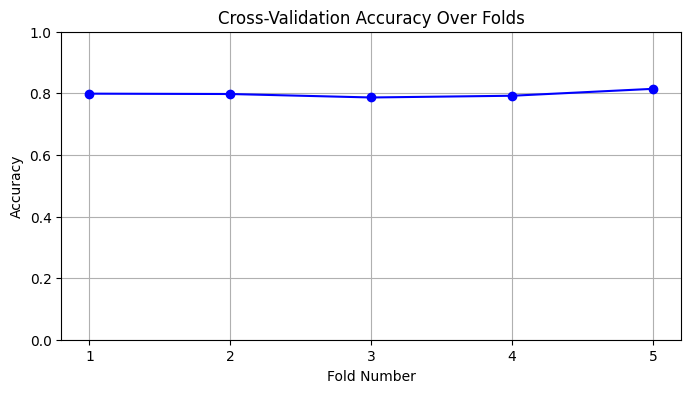

In [15]:
plt.figure(figsize=(8,4))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Accuracy Over Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(1, len(cv_scores)+1))
plt.grid(True)
plt.show()